In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from helper import make_windows

In [17]:
window_size = 100
batch_size = 10

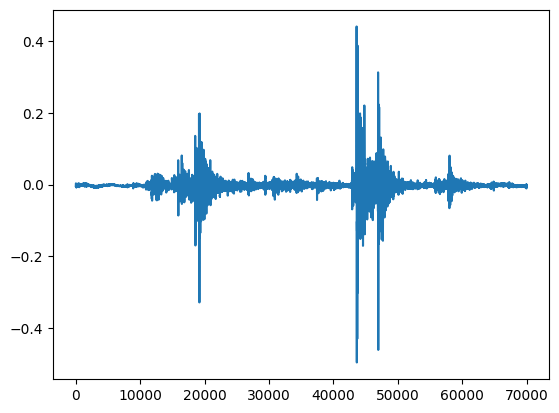

In [6]:
sample_data = np.loadtxt("../datasets/sample_data.txt")[30000:100000]/4e6
plt.plot(sample_data)

In [18]:
windows,labels = make_windows(sample_data,window_size,batch_size)
windows.shape,labels.shape

((69891, 100), (69891, 10))

In [19]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(windows[0])
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 

Original shape: (100,)
Expanded shape: (100, 1)


In [20]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  tf.keras.layers.Dense(batch_size)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(windows,
            labels,
            batch_size=128, 
            epochs=100,
            )

Epoch 1/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 2/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 3/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 4/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 5/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 6/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 7/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 8/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 9/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 10/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 11/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 12/100
547/547 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 13/100


In [21]:
model_4_preds = tf.squeeze(model_4.predict(windows))
model_4_preds.shape

2185/2185 [==============================] - 2s 1ms/step


TensorShape([69891, 10])

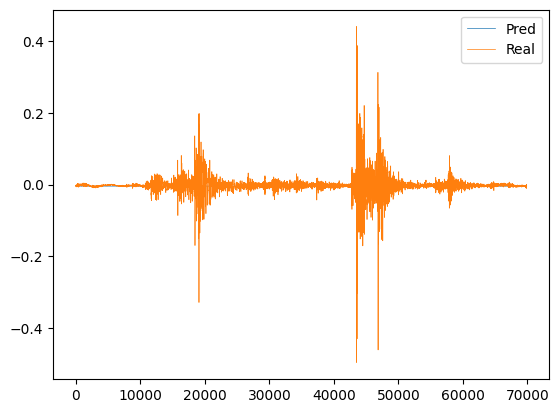

In [23]:
plt.plot(model_4_preds[:,0],label="Pred",linewidth=0.5)
plt.plot(labels[:,0],label="Real",linewidth=0.5)
plt.legend()